### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
# Define path
path=r'C:\\\\Users\\\\maad0\\\\OneDrive\\\\CAREERFOUNDRY Notes\\\\Advanced Analytics_Dashboard Design\\\\11-2023 Final Project'

In [4]:
df_flavors = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_flavors_metrics_regions_chg.csv'), index_col = False)

### Data Cleaning

In [5]:
df_flavors.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'reference_number',
       'company_manufacturer', 'company_location', 'review_date',
       'bean_origin', 'bar_name', 'cocoa_percent', 'rating', 'bean_type',
       'rating_metrics', 'regions'],
      dtype='object')

In [6]:
# Delete unnecessary columns
df_flavors = df_flavors.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

In [7]:
# Delete unnecessary columns
df_flavors = df_flavors.drop(columns=['bean_type',  'reference_number'])

In [8]:
#Rename column name to coincide with json file
df_flavors.rename(columns = {'company_location' : 'state_name'}, inplace = True)

In [9]:
# Checking head()
df_flavors.head()

,company_manufacturer,state_name,review_date,bean_origin,bar_name,cocoa_percent,rating,rating_metrics,regions
0,Cote d' Or (Kraft),Belgium,2006,,Sensations Intense,0.70,1.0,Unpleasant,Unknown
1,Bonnat,France,2006,,One Hundred,1.00,1.5,Unpleasant,Unknown
2,Dolfin (Belcolade),Belgium,2006,,Noir,0.70,1.5,Unpleasant,Unknown
3,Felchlin,Switzerland,2006,,Supremo- SF,0.62,2.0,Disappointing,Unknown
4,Jacque Torres,U.S.A.,2006,Ghana,Trinatario Treasure,0.71,2.0,Disappointing,Africa


In [10]:
df_flavors.shape

(1795, 9)

#### Missing values

In [11]:
# Checking for missing values
df_flavors.isna().sum()

company_manufacturer    0
state_name              0
review_date             0
bean_origin             0
bar_name                0
cocoa_percent           0
rating                  0
rating_metrics          0
regions                 0
dtype: int64

#### No missing values to handle.

#### Duplicates check

In [12]:
# Checking for duplicates
df_flavors.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1790    False
1791    False
1792    False
1793    False
1794    False
Length: 1795, dtype: bool

#### No duplicates found.

### Checking for Extreme values

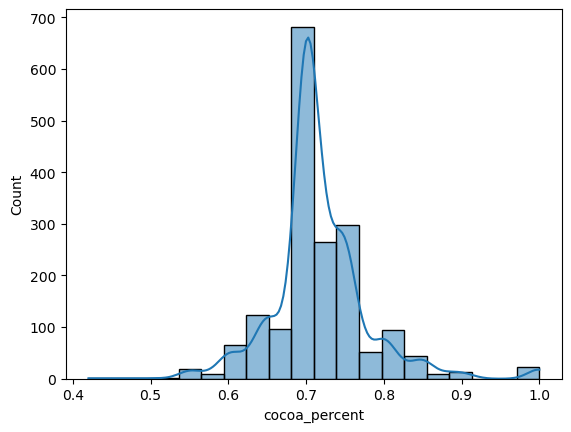

In [13]:
# Create histogram for extreme value check for ratings
hist_rating = sns.histplot(df_flavors['cocoa_percent'], bins = 20, kde = True)

In [14]:
# Export visualization
hist_rating.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cocoa_percent.png'))

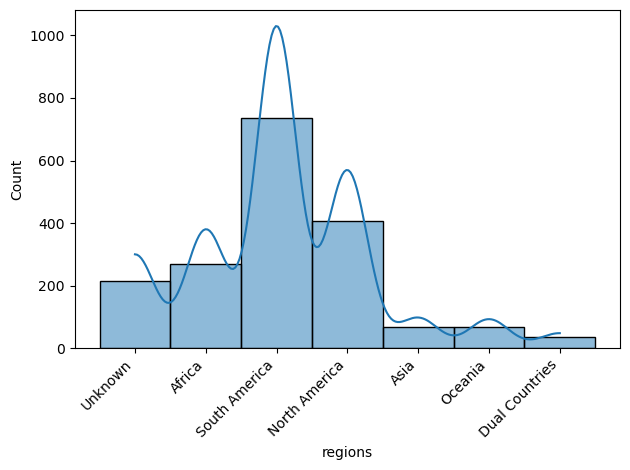

In [15]:
# Create histogram for extreme value check for regions
hist_region = sns.histplot(df_flavors['regions'], bins=75, kde=True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [16]:
# Export visualization
hist_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regions_rating_count.png'))

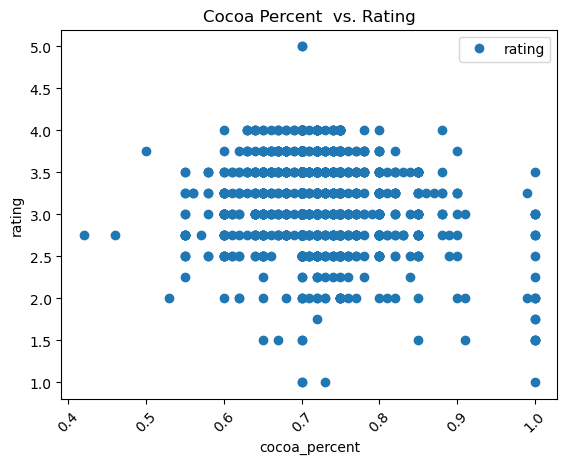

In [17]:
# Create a scatterplot for cocoa_percent and rating
df_flavors.plot(x = 'cocoa_percent', y = 'rating', style='o'),
plt.title('Cocoa Percent  vs. Rating'),
plt.xlabel('cocoa_percent'),
plt.ylabel('rating'),
plt.xticks(rotation=45)
plt.show()

### Hypothesis: The percentage of cocoa in a chocolate bar is related to its rating. 
#### (The higher the percentage of cocoa in a chocolate bar, the higher the rating.)

In [18]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_flavors['cocoa_percent'].values.reshape(-1,1)
y = df_flavors['rating'].values.reshape(-1,1)

In [19]:
X

array([[0.7],
       [1. ],
       [0.7],
       ...,
       [0.7],
       [0.7],
       [0.7]])

In [20]:
X.shape

(1795, 1)

In [21]:
y

array([[1.  ],
       [1.5 ],
       [1.5 ],
       ...,
       [3.5 ],
       [3.75],
       [3.75]])

In [22]:
y.shape

(1795, 1)

In [23]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression Analysis

In [24]:
# Creating a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [25]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [26]:
# Predict the values of y using x
y_predicted = regression.predict(X_test)

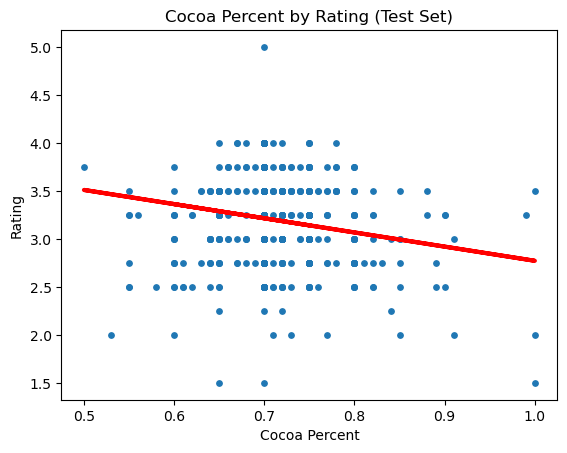

In [29]:
# Created a plot that shows the regression line from the model on the test set.
fig, plot_test = plt.subplots()
plot_test.scatter(X_test, y_test, s=15)
plot_test.plot(X_test, y_predicted, color='red', linewidth=3)
plot_test.set_title('Cocoa Percent by Rating (Test Set)')
plot_test.set_xlabel('Cocoa Percent')
plot_test.set_ylabel('Rating')
plt.show()

### In reviewing the graph, the linear regression line show a negative correlation between the variables. It appears that the graph contradicts my hypothesis that the higher the cocoa percentage, the higher the rating.

In [30]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [31]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:', regression.coef_),
print('Mean squared error:', rmse),
print('R2 score:', r2)

Slope: [[-1.47630264]]
Mean squared error: 0.21285764878169025
R2 score: -0.002484211168275685


In [32]:
y_predicted

array([[3.36264174],
       [3.18548542],
       [3.21501148],
       [3.06738121],
       [3.34787872],
       [3.21501148],
       [3.18548542],
       [3.14119635],
       [3.43645687],
       [3.21501148],
       [3.21501148],
       [3.14119635],
       [3.06738121],
       [2.99356608],
       [3.25930056],
       [3.03785516],
       [3.28882661],
       [3.51027201],
       [3.28882661],
       [3.14119635],
       [3.30358964],
       [3.18548542],
       [3.25930056],
       [3.14119635],
       [3.21501148],
       [3.21501148],
       [3.11167029],
       [3.33311569],
       [3.03785516],
       [3.03785516],
       [3.21501148],
       [3.1707224 ],
       [3.21501148],
       [3.14119635],
       [3.21501148],
       [3.09690727],
       [3.21501148],
       [3.14119635],
       [3.06738121],
       [3.00832911],
       [3.21501148],
       [3.21501148],
       [3.11167029],
       [3.2297745 ],
       [3.21501148],
       [3.21501148],
       [3.21501148],
       [3.288

In [33]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,3.00,3.362642
1,3.50,3.185485
2,3.25,3.215011
3,3.00,3.067381
4,2.75,3.347879
5,2.75,3.215011
6,3.00,3.185485
7,3.00,3.141196
8,3.25,3.436457
9,4.00,3.215011


### Compare how the regression fits the training set

In [34]:
# Predict
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [35]:
rmse = mean_squared_error(y_train, y_predicted_train),
r2 = r2_score(y_train, y_predicted_train)

In [36]:
print('Slope:' ,regression.coef_) ,
print('Mean squared error:', rmse),
print('R2 score:', r2)

Slope: [[-1.47630264]]
Mean squared error: (0.22652289007718518,)
R2 score: 0.037277869739341885


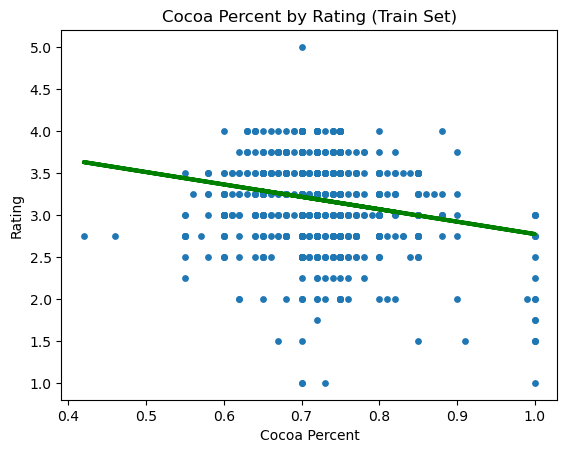

In [37]:
# Visualizing the training set results.
fig, plot_test = plt.subplots()
plot_test.scatter(X_train, y_train, s=15)
plot_test.plot(X_train, y_predicted_train, color='green', linewidth=3)
plot_test.set_title('Cocoa Percent by Rating (Train Set)')
plot_test.set_xlabel('Cocoa Percent')
plot_test.set_ylabel('Rating')
plt.show()

### Thoughts on model performance and bias
#### The slope of the regression line is -1.47630264, which indicates a negative relationship and shows that as the cocoa percentage rises, the chocolate bar ratings drop. The mean squared error is 0.21285764878169025, which shows the average squared difference between the predicted and actual values (y-variable). The R2 score is -0.002484211168275685, which does not fall between 0 and 1, which leaves me to believe that my model does not fit the data well.  #### I did not remove the possible outlier (Rating: '5') as I did not consider this as a true outlier, so this may have impacted the performance of my model.  Additionally, there is potential bias, due to the review ratings being based on human decisions. 

### Exploring Additional Variables

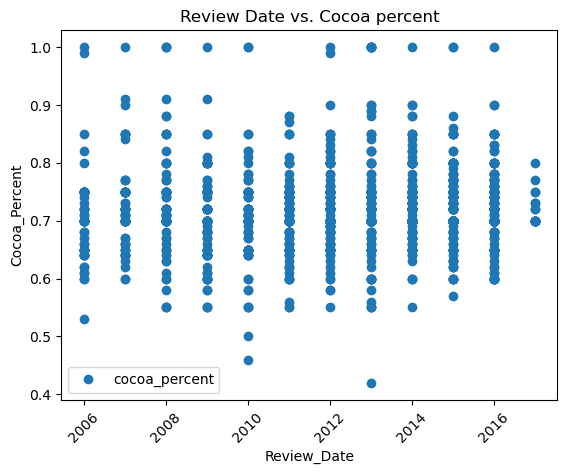

In [38]:
# Create a scatterplot for Review Date and cocoa percent
df_flavors.plot(x = 'review_date', y = 'cocoa_percent', style='o'),
plt.title('Review Date vs. Cocoa percent'),
plt.xlabel('Review_Date'),
plt.ylabel('Cocoa_Percent'),
plt.xticks(rotation=45)
plt.show()

In [39]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_flavors['review_date'].values.reshape(-1,1)
y = df_flavors['cocoa_percent'].values.reshape(-1,1)

In [40]:
X

array([[2006],
       [2006],
       [2006],
       ...,
       [2017],
       [2017],
       [2017]], dtype=int64)

In [41]:
y

array([[0.7],
       [1. ],
       [0.7],
       ...,
       [0.7],
       [0.7],
       [0.7]])

In [42]:
X.shape

(1795, 1)

In [43]:
y.shape

(1795, 1)

In [44]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [45]:
# Creating a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [46]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [47]:
# Predict the values of y using x
y_predicted = regression.predict(X_test)

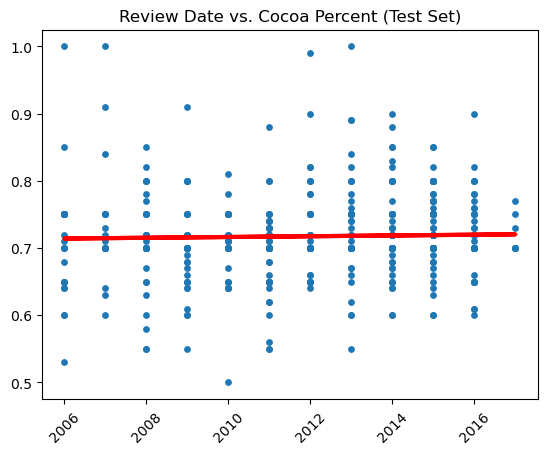

In [48]:
# Created a plot that shows the regression line from the model on the test set.
fig, plot_test = plt.subplots()
plot_test.scatter(X_test, y_test, s=15)
plot_test.plot(X_test, y_predicted, color='red', linewidth=3)
plot_test.set_title('Review Date vs. Cocoa Percent (Test Set)')
plt.xticks(rotation=45)
plt.show()

### In reviewing the graph, the linear regression line show a slight positive correlation between the variables.  This graph could possibly support my hypothesis that the average percentage of cocoa in bars changes as the years go by. 

In [49]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [50]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:', regression.coef_),
print('Mean squared error:', rmse),
print('R2 score:', r2)

Slope: [[0.00056792]]
Mean squared error: 0.003919879982569102
R2 score: 0.0009721312560704298


In [51]:
y_predicted

array([[0.71931949],
       [0.71988741],
       [0.71818365],
       [0.71761572],
       [0.71591195],
       [0.71534403],
       [0.71591195],
       [0.71818365],
       [0.71818365],
       [0.71875157],
       [0.71761572],
       [0.71931949],
       [0.71875157],
       [0.71420819],
       [0.71534403],
       [0.71534403],
       [0.71988741],
       [0.71647988],
       [0.71988741],
       [0.71761572],
       [0.7170478 ],
       [0.71647988],
       [0.71818365],
       [0.71931949],
       [0.71988741],
       [0.71931949],
       [0.71988741],
       [0.71818365],
       [0.71931949],
       [0.71818365],
       [0.71875157],
       [0.71988741],
       [0.71931949],
       [0.71420819],
       [0.71931949],
       [0.71818365],
       [0.71591195],
       [0.71761572],
       [0.71591195],
       [0.71477611],
       [0.71931949],
       [0.71931949],
       [0.71931949],
       [0.71591195],
       [0.71931949],
       [0.7170478 ],
       [0.71988741],
       [0.716

In [52]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.60,0.719319
1,0.72,0.719887
2,0.70,0.718184
3,0.80,0.717616
4,0.61,0.715912
5,0.70,0.715344
6,0.72,0.715912
7,0.75,0.718184
8,0.55,0.718184
9,0.70,0.718752


### Compare how the regression fits the training set

In [53]:
# Predict
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [54]:
rmse = mean_squared_error(y_train, y_predicted_train),
r2 = r2_score(y_train, y_predicted_train)

In [55]:
print('Slope:' ,regression.coef_) ,
print('Mean squared error:', rmse),
print('R2 score:', r2)

Slope: [[0.00056792]]
Mean squared error: (0.004021771998123868,)
R2 score: 0.0006766945624970822


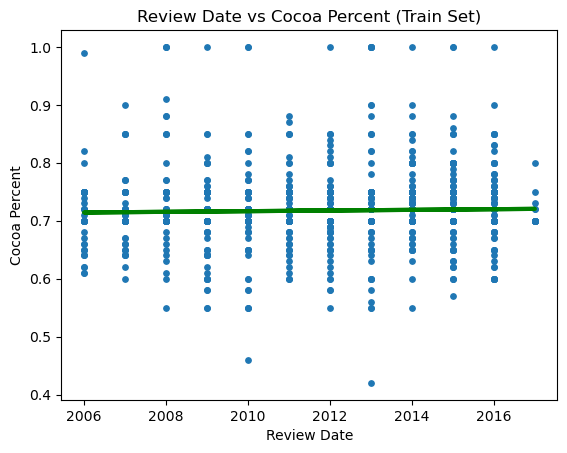

In [56]:
# Visualizing the training set results.
fig, plot_test = plt.subplots()
plot_test.scatter(X_train, y_train, s=15)
plot_test.plot(X_train, y_predicted_train, color='green', linewidth=3)
plot_test.set_title('Review Date vs Cocoa Percent (Train Set)')
plot_test.set_xlabel('Review Date')
plot_test.set_ylabel('Cocoa Percent')
plt.show()

### Thoughts on model performance
####The slope of the regression line is 0.00056792, which indicates a positive linear relationship between the two variables, meaning the cocoa percent increases slightly as the review date variable increases. The mean squared error is 0.003919879982569102, indicating that the regression line is close to the observation points, making it a good fit. The R2 score is 0.0009721312560704298, a fairly small number, indicating that my regression model explains less than 0.1% of the variation in the y-variable—leaving the assumption that my model does not fit the data well.  
